# 💼 IT Job Listings in Bulgaria (2023–2025)

This notebook analyzes trends in Bulgaria's IT job market by comparing historical data from 2023 with newly scraped data from [Dev.bg](https://dev.bg). The goal is to identify how the number and distribution of job listings have evolved between 2023 and 2025.

The analysis builds upon a 2023 dataset available on [Kaggle](https://www.kaggle.com/code/dimodimchev/deep-dive-into-bulgaria-s-it-job-market-trends/input), and extends it using a custom web scraper and a data updating module that collects and integrates recent job listings into the same CSV file.


## 🛠️ Data Pipeline Overview

The data was collected using a custom web scraper built with `BeautifulSoup`, and cleaned using a Python utility module.

- Source: [dev.bg](https://dev.bg)
- Fields collected: date, number of listings for back-end development, java, .NET, PHP, C/C++/Embedded, Python, Ruby, Go, Node.js, front-end development, JavaScript, React, Angular, Vue, Full-stack development, PM/BA, QA, DevOps, DB engineer, Cyber security, Sys admin, data warehouse, big data, data visualization, ML and AI, UI/UX, technical support, mobile, iOS, Android, IT management, junior
- Output: `data/cleaned_dataset.csv`

📌 You can add new data to the dataset by running `python main.py`.


### Import the required modules

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Reset the seaborn theme

In [2]:
sns.set_theme()

Get the cleaned dataset file

In [3]:
file = os.path.join(os.getcwd(), 'data' , 'cleaned_dataset.csv')

Create a dataframe from the cleaned dataset

In [4]:
df = pd.read_csv(file)

### Change the date format to datetime and set the date as index

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.set_index('date', inplace=True)

### Presentation of the dataset

In [7]:
df.head()

,id,backenddevelopment,java,dotnet,php,ccplusplusembeded,python,ruby,go,nodejs,...,bigdata,datavisualisation,mlandai,ui_ux,technical_support,mobile,ios,android,itmanagment,junior
date,,,,,,,,,,,,,,,,,,,,,
2023-08-13,1,953,284,183,130,138,85,7,21,74,...,15,55,45,52,123,86,28,40,27,146
2023-08-14,2,954,282,187,128,139,86,8,22,73,...,15,56,46,51,121,86,28,40,26,144
2023-08-15,14,951,284,187,125,136,82,8,24,80,...,16,55,47,54,116,86,28,40,25,150
2023-08-16,25,955,282,188,126,137,83,8,23,82,...,16,55,45,54,116,83,28,39,26,138
2023-08-17,31,939,273,184,129,133,83,7,23,80,...,16,55,46,55,112,90,29,44,27,131


Show the columns and column informations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2023-08-13 to 2025-06-08
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   87 non-null     int64
 1   backenddevelopment   87 non-null     int64
 2   java                 87 non-null     int64
 3   dotnet               87 non-null     int64
 4   php                  87 non-null     int64
 5   ccplusplusembeded    87 non-null     int64
 6   python               87 non-null     int64
 7   ruby                 87 non-null     int64
 8   go                   87 non-null     int64
 9   nodejs               87 non-null     int64
 10  frontenddevelopment  87 non-null     int64
 11  js                   87 non-null     int64
 12  react                87 non-null     int64
 13  angular              87 non-null     int64
 14  vue                  87 non-null     int64
 15  fulstackdevelopment  87 non-null     int64
 16  pmandba 

### We create a new dataset by grouping the results by month and get the mean of every category for the month

In [9]:
df_grouped_by_month = df.resample('ME').mean().round(2)

Resample creates NaN rows for months that have not been calculated, so we drop the rows which are composed on only NaN values

In [10]:
df_grouped_by_month = df_grouped_by_month.dropna(axis=0, how='all')

### Presentation of the new dataset grouped by month

In [11]:
df_grouped_by_month.head()

,id,backenddevelopment,java,dotnet,php,ccplusplusembeded,python,ruby,go,nodejs,...,bigdata,datavisualisation,mlandai,ui_ux,technical_support,mobile,ios,android,itmanagment,junior
date,,,,,,,,,,,,,,,,,,,,,
2023-08-31,40.21,925.63,271.47,183.84,121.37,134.00,83.58,8.00,19.74,77.16,...,12.89,56.58,47.32,53.63,107.16,88.26,27.89,42.37,29.21,126.79
2023-09-30,94.20,853.93,251.50,161.47,110.67,131.83,80.47,8.17,20.23,59.93,...,7.07,45.27,49.17,56.70,98.80,86.13,23.00,39.77,38.17,127.33
2023-10-31,155.32,852.03,241.19,164.13,110.03,131.23,74.32,8.48,24.16,66.74,...,10.68,45.71,52.35,69.00,101.35,84.10,22.32,36.03,38.42,131.29
2025-06-30,193.00,603.57,176.57,124.29,37.43,67.14,78.43,5.29,25.00,62.14,...,5.00,52.57,75.14,62.86,102.00,47.43,16.86,16.57,35.00,126.43


Show the columns and column information of the new dataframe

In [12]:
df_grouped_by_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2023-08-31 to 2025-06-30
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4 non-null      float64
 1   backenddevelopment   4 non-null      float64
 2   java                 4 non-null      float64
 3   dotnet               4 non-null      float64
 4   php                  4 non-null      float64
 5   ccplusplusembeded    4 non-null      float64
 6   python               4 non-null      float64
 7   ruby                 4 non-null      float64
 8   go                   4 non-null      float64
 9   nodejs               4 non-null      float64
 10  frontenddevelopment  4 non-null      float64
 11  js                   4 non-null      float64
 12  react                4 non-null      float64
 13  angular              4 non-null      float64
 14  vue                  4 non-null      float64
 15  fulstackdevelopment  4 

### Look for the evolution of the dev technologies over the time period

Create a df composed of BE, FE, full-stack and mobile.

In [13]:
technologies = (df_grouped_by_month[['backenddevelopment', 'frontenddevelopment', 'fulstackdevelopment', 'mobile']])

Create a bar plot with the evolution of all the technologies

[Text(0, 0, 'Back End'),
 Text(0, 1, 'Front end'),
 Text(0, 2, 'Full stack'),
 Text(0, 3, 'Mobile')]

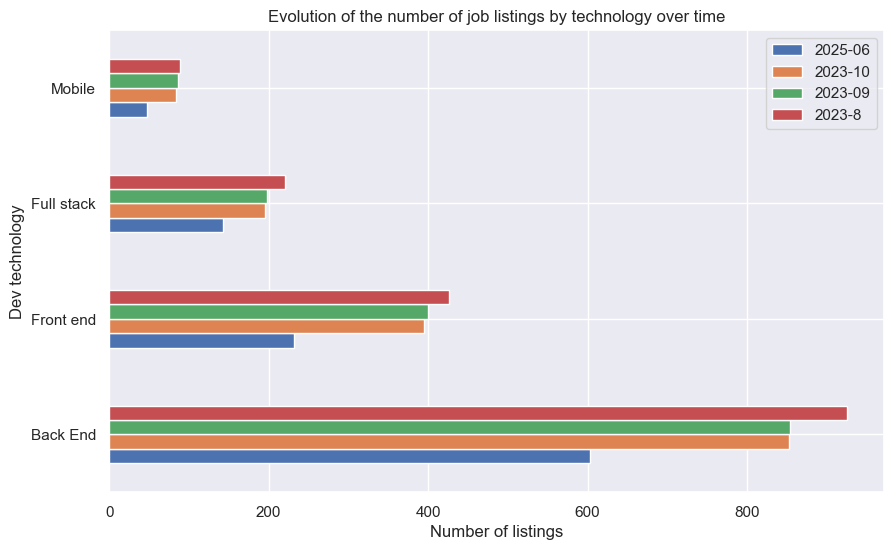

In [14]:
ax = technologies.T[technologies.T.columns[::-1]].plot(kind='barh', figsize=(10,6))
plt.xlabel('Number of listings')
plt.ylabel('Dev technology')
plt.title('Evolution of the number of job listings by technology over time')
plt.legend(['2025-06', '2023-10', '2023-09', '2023-8'])
ax.set_yticklabels(['Back End', 'Front end', 'Full stack', 'Mobile'])

📉 It looks like there is a constant diminution in the search for developers in Bulgaria.

### Check the evolution of backend technologies between September 2023 and June 2025

Create a pie of all the BE languages in 2023

Text(0, 0.5, '')

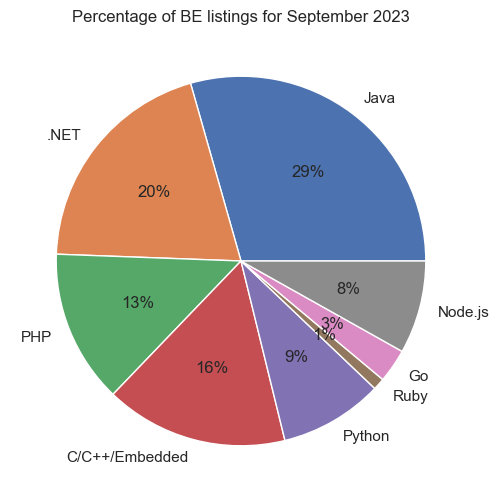

In [15]:
plt.figure(figsize=(10,6))
(df_grouped_by_month[['java', 'dotnet', 'php', 'ccplusplusembeded', 'python', 'ruby', 'go', 'nodejs']]
 .loc['2023-10-31']
 .plot(kind='pie', autopct='%.0f%%', labels=['Java', '.NET', 'PHP', 'C/C++/Embedded', 'Python', 'Ruby', 'Go', 'Node.js']))
plt.title('Percentage of BE listings for September 2023')
plt.ylabel(None)


In 2023, **Java** and **.NET** were the first two technologies with the most listings 💪. It was followed by **PHP** and **C/C++**.

Create a pie with all of the BE technologies in 2025

Text(0, 0.5, '')

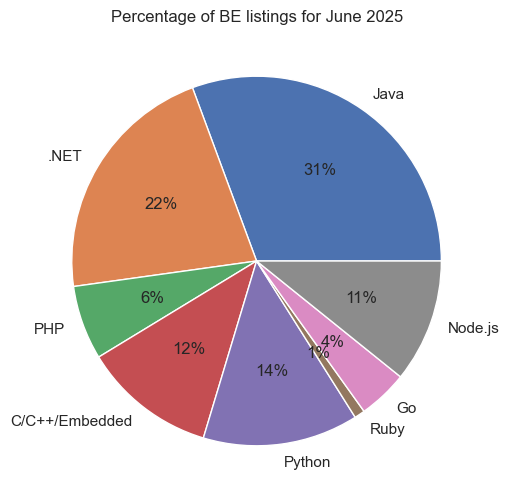

In [16]:
plt.figure(figsize=(10,6))
(df_grouped_by_month[['java', 'dotnet', 'php', 'ccplusplusembeded', 'python', 'ruby', 'go', 'nodejs']]
 .loc['2025-06-30']
 .plot(kind='pie', autopct='%.0f%%', labels=['Java', '.NET', 'PHP', 'C/C++/Embedded', 'Python', 'Ruby', 'Go', 'Node.js']))
plt.title('Percentage of BE listings for June 2025')
plt.ylabel(None)

In 2025, the same 2 technologies are at the top, but **Python** has jumped to the 3rd place 📈.

### Check the evolution of Python between the 2 dates

Create a bar plot of Python listings in 2023 and 2025

Text(0.5, 1.0, 'Number of Python listings between 2023 and 2025')

<Figure size 1000x600 with 0 Axes>

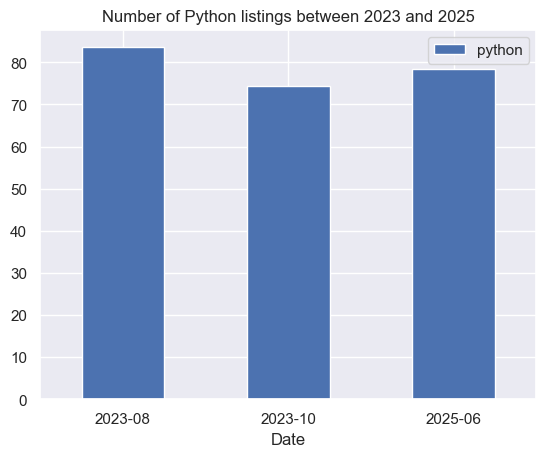

In [17]:
plt.figure(figsize=(10,6))
ax = (df_grouped_by_month[['python']].loc[['2023-08-31','2023-10-31', '2025-06-30']]
 .plot(kind='bar',
       y='python',
       rot=0,
       xlabel='Date',))
ax.set_xticklabels(['2023-08', '2023-10', '2025-06'])
plt.title('Number of Python listings between 2023 and 2025')

Although the number of listings **Python** has decreased, we can see that the other BE languages have decreased more, since it has become the 3rd most searched BE language

### Check the evolution of data and AI related positions

Show the evolution of data and AI positions in June 2025 and September 2023

In [18]:
(df_grouped_by_month[['bigdata', 'datavisualisation', 'mlandai']]
.loc[['2025-06-30', '2023-10-31']])

,bigdata,datavisualisation,mlandai
date,,,
2025-06-30,5.00,52.57,75.14
2023-10-31,10.68,45.71,52.35


Create a stacked bar plot of the AI/Data positions between 2023-10 and 2025-06

<Figure size 1000x600 with 0 Axes>

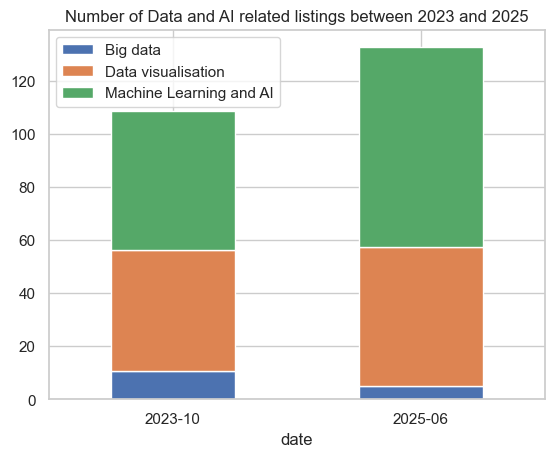

In [19]:
plt.figure(figsize=(10,6))
ax = (df_grouped_by_month[['bigdata', 'datavisualisation', 'mlandai']].loc[['2023-10-31', '2025-06-30']]
.plot(kind='bar', stacked=True, rot=0))
ax.set_xticklabels(['2023-10', '2025-06'])
plt.title('Number of Data and AI related listings between 2023 and 2025')
plt.legend(['Big data', 'Data visualisation', 'Machine Learning and AI'])

**Bigdata** has seen a drop in listings, but **Data visualisation** and **ML/AI** has seen a strong increase

### Check the evolution of Business-related positions (QA, BA, PMO...)

Create a bar plot of BA, QA, management and technical support positions

<Figure size 1000x600 with 0 Axes>

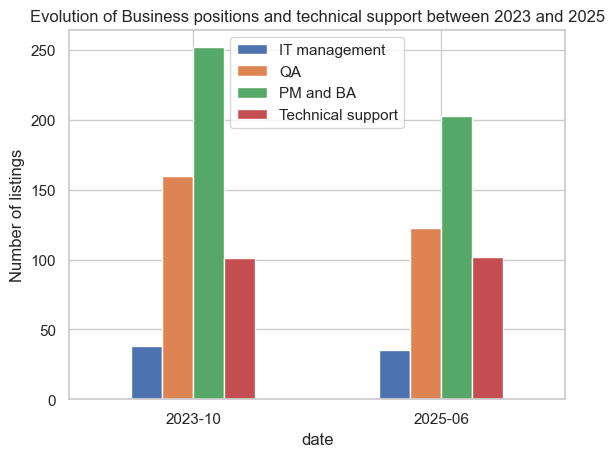

In [20]:
plt.figure(figsize=(10,6))
ax = (df_grouped_by_month[['itmanagment', 'qa', 'pmandba', 'technical_support']]
 .loc[[ '2023-10-31', '2025-06-30']]
 .plot(kind='bar', rot=0))
plt.title('Evolution of Business positions and technical support between 2023 and 2025')
ax.set_xticklabels(['2023-10', '2025-06'])
plt.ylabel('Number of listings')
plt.legend(['IT management', 'QA', 'PM and BA', 'Technical support'])


**Technical support** hasn't moved much in two years, but there has been a drop in demand for all the other positions